In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Python kütüphanesi Plotly'nin basit ve sezgisel arayüzüdür. Veri görselleştirme amacıyla kullanılır ve birkaç satır kod
# ile karmaşık grafikler oluşturmanıza olanak tanır.

from sklearn.linear_model import LinearRegression  # doğrusal regresyon modelleri oluşturmak için kullanılır. Doğrusal regresyon, bağımlı bir değişken 
# ile bir veya daha fazla bağımsız değişken arasındaki ilişkiyi modellemek için kullanılan istatistiksel bir tekniktir.


from sklearn.model_selection import train_test_split # veri setini eğitim ve test setlerine ayırmak için kullanılır. Bu fonksiyon, makine öğrenimi 
#modellerini eğitmek ve değerlendirmek için veri setinin bölünmesini kolaylaştırır.

from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV #train_test_split ve GridSearchCV fonksiyonları, makine öğrenimi modellerini eğitmek
#ve optimize etmek için kullanılan güçlü araçlardır. train_test_split, veri setini eğitim ve test setlerine ayırırken, GridSearchCV modelin
#hiperparametrelerini optimize etmek için kullanılır.


from sklearn.preprocessing import LabelEncoder # kategorik verileri sayısal değerlere dönüştürmek için kullanılır. Bu dönüştürme işlemi, makine
#öğrenimi modelleri ile çalışırken kategorik verilerin kullanılabilmesi için gereklidir.

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error  # scikit-learn kütüphanesinde bulunan ve makine öğrenimi 
#modellerinin performansını değerlendirmek için kullanılan metriklerdir. Bu metrikler, sınıflandırma ve regresyon görevleri için farklı performans 
#ölçütleri sağlar.

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # RandomForestClassifier ve GradientBoostingClassifier, scikit-learn 
#kütüphanesinde bulunan ve sınıflandırma görevleri için kullanılan iki güçlü topluluk öğrenme (ensemble learning) yöntemidir. Bu sınıflandırıcılar, 
#birden fazla karar ağacının kombinasyonunu kullanarak tahmin yaparlar, ancak farklı stratejilerle çalışırlar.


from sklearn.linear_model import LogisticRegression  # LogisticRegression, scikit-learn kütüphanesinde bulunan ve ikili sınıflandırma 
#(binary classification) problemleri için yaygın olarak kullanılan bir regresyon modelidir. Lojistik regresyon, bağımlı değişkenin olasılıklarını
#modellemek için kullanılır ve sigmoid fonksiyonu ile doğrusal bir modelin çıktılarını olasılık aralığına (0-1) dönüştürür.

import warnings

In [4]:
df = pd.read_csv(r"C:\Users\Özkan\Desktop\Yeni klasör\NASDAQ 1962-2024.csv")
df

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0
...,...,...,...,...,...,...,...,...,...
11470958,2024-05-16,ZYXI,NASDAQ,11.01,11.01,10.86,11.00,11.000000,62700.0
11470959,2024-05-17,ZYXI,NASDAQ,11.01,11.01,10.84,10.88,10.880000,62000.0
11470960,2024-05-20,ZYXI,NASDAQ,10.89,10.99,10.56,10.56,10.560000,67000.0
11470961,2024-05-21,ZYXI,NASDAQ,10.53,10.63,10.42,10.58,10.580000,60300.0


In [5]:
df.head(10)

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0
5,2008-02-05,AACG,NASDAQ,9.50,9.50,9.03,9.11,0.731496,29500.0
6,2008-02-06,AACG,NASDAQ,9.00,9.43,8.67,9.00,0.722663,16000.0
7,2008-02-07,AACG,NASDAQ,9.00,9.50,9.00,9.40,0.754782,6000.0
8,2008-02-08,AACG,NASDAQ,9.12,9.29,9.00,9.01,0.723466,7900.0
9,2008-02-11,AACG,NASDAQ,9.05,9.17,9.00,9.04,0.725875,3500.0


In [6]:
df.tail()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
11470958,2024-05-16,ZYXI,NASDAQ,11.01,11.01,10.86,11.00,11.00,62700.0
11470959,2024-05-17,ZYXI,NASDAQ,11.01,11.01,10.84,10.88,10.88,62000.0
11470960,2024-05-20,ZYXI,NASDAQ,10.89,10.99,10.56,10.56,10.56,67000.0
11470961,2024-05-21,ZYXI,NASDAQ,10.53,10.63,10.42,10.58,10.58,60300.0
11470962,2024-05-22,ZYXI,NASDAQ,10.52,10.63,10.43,10.47,10.47,50200.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470963 entries, 0 to 11470962
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Ticker     object 
 2   Exchange   object 
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Adj Close  float64
 8   Volume     float64
dtypes: float64(6), object(3)
memory usage: 787.6+ MB


In [9]:
df.isnull().sum()

Date           0
Ticker       470
Exchange       0
Open         130
High         130
Low          130
Close        130
Adj Close    130
Volume       130
dtype: int64

In [13]:
df_ = df.fillna(value=0,inplace=False)
df_

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0
...,...,...,...,...,...,...,...,...,...
11470958,2024-05-16,ZYXI,NASDAQ,11.01,11.01,10.86,11.00,11.000000,62700.0
11470959,2024-05-17,ZYXI,NASDAQ,11.01,11.01,10.84,10.88,10.880000,62000.0
11470960,2024-05-20,ZYXI,NASDAQ,10.89,10.99,10.56,10.56,10.560000,67000.0
11470961,2024-05-21,ZYXI,NASDAQ,10.53,10.63,10.42,10.58,10.580000,60300.0


In [14]:
df.columns.tolist()

['Date',
 'Ticker',
 'Exchange',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume']

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,11470833.0,4.334294e+06,4.395184e+08,0.000000,5.540000,14.380000,34.424999,1.356750e+11
High,11470833.0,4.515192e+06,4.580069e+08,0.000000,6.000000,14.904762,35.400002,1.370250e+11
Low,11470833.0,4.127968e+06,4.167883e+08,0.000000,5.740000,14.310000,34.070000,1.275750e+11
Close,11470833.0,4.333093e+06,4.394594e+08,0.000000,5.875000,14.600000,34.750000,1.363500e+11
Adj Close,11470833.0,4.332938e+06,4.394594e+08,-4.232767,4.680035,11.680000,30.394136,1.363500e+11
Volume,11470833.0,1.469437e+06,1.718761e+07,0.000000,5267.000000,55000.000000,368000.000000,7.421641e+09


In [16]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,11470963,15705,2024-05-21,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticker,11470493,3370,AEP,15705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exchange,11470963,1,NASDAQ,11470963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,11470833.0,NaN,NaN,NaN,4334293.900386,439518384.044407,0.0,5.54,14.38,34.424999,135675002880.0
High,11470833.0,NaN,NaN,NaN,4515191.563826,458006868.736425,0.0,6.0,14.904762,35.400002,137025003520.0
Low,11470833.0,NaN,NaN,NaN,4127967.516432,416788342.298724,0.0,5.74,14.31,34.07,127574999040.0
Close,11470833.0,NaN,NaN,NaN,4333092.870294,439459350.783651,0.0,5.875,14.6,34.75,136349999104.0
Adj Close,11470833.0,NaN,NaN,NaN,4332938.062522,439459350.98469,-4.232767,4.680035,11.68,30.394136,136349999104.0
Volume,11470833.0,NaN,NaN,NaN,1469437.093728,17187608.120237,0.0,5267.0,55000.0,368000.0,7421640800.0


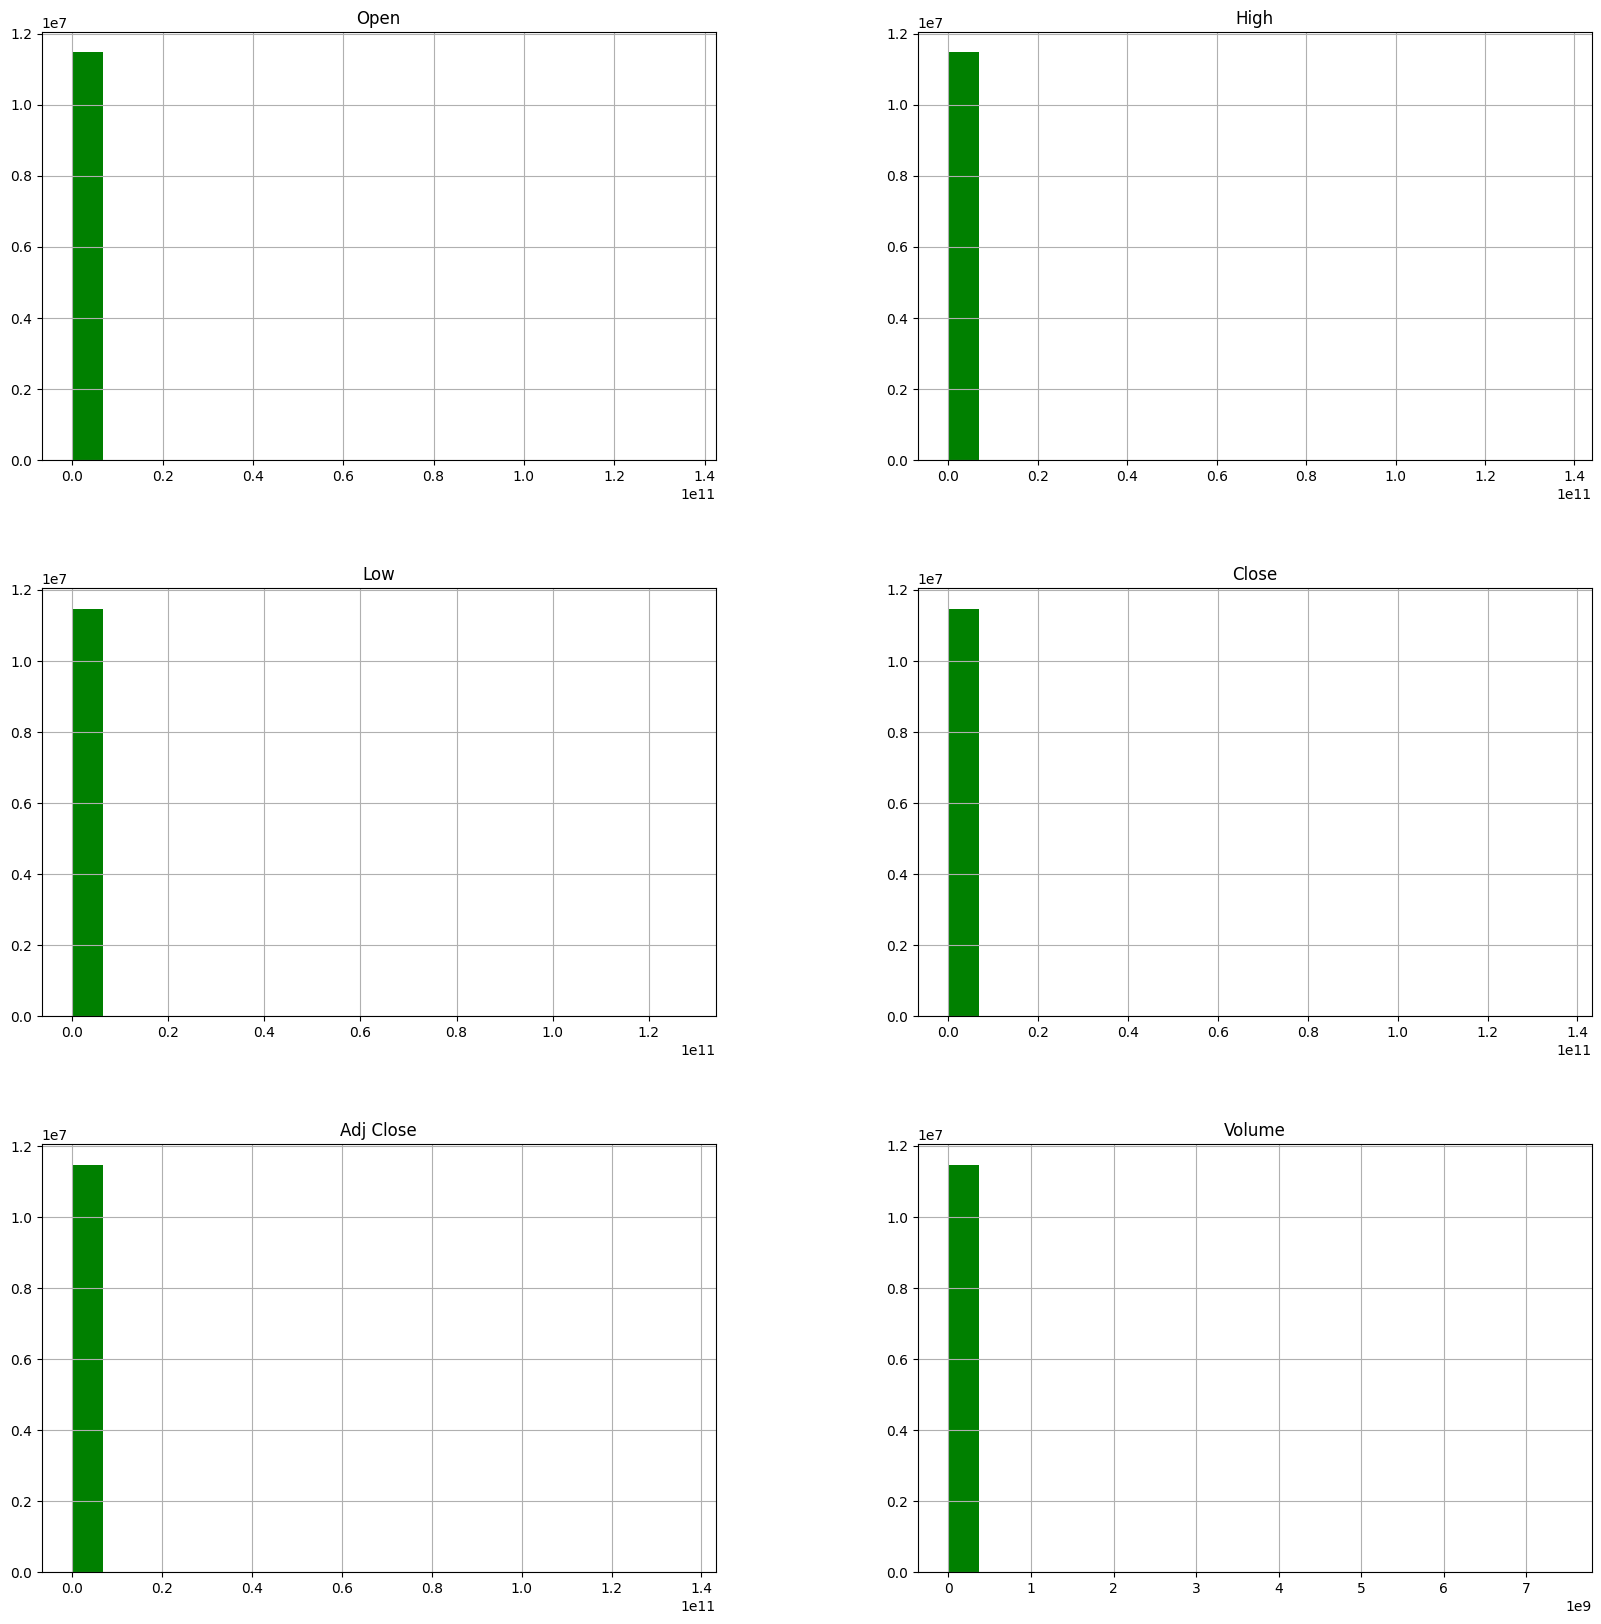

In [17]:
df.hist(bins=20, figsize = (20,20), color = "g")
plt.show()

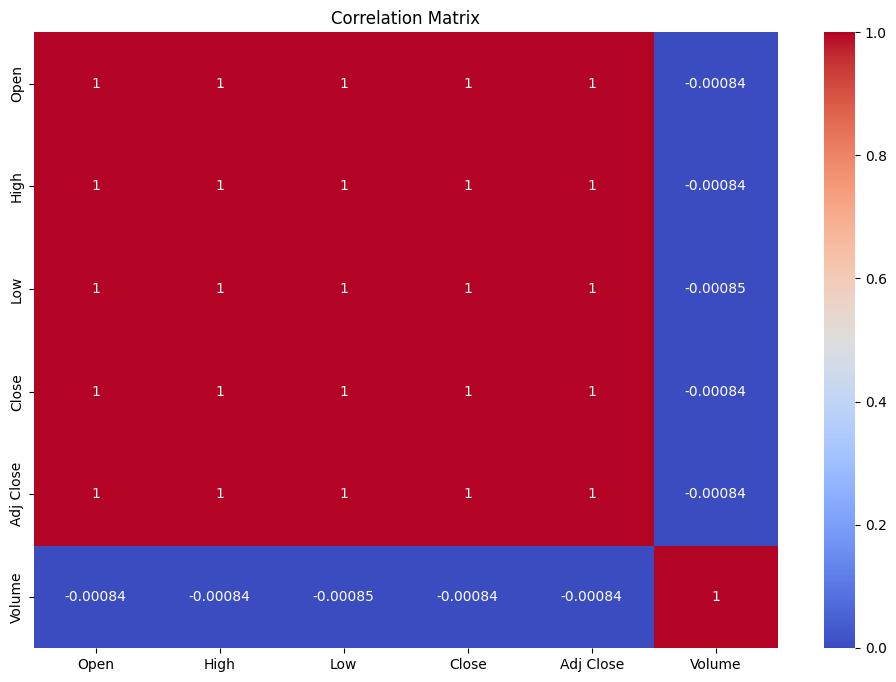

In [18]:
numeric_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize = (12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



# KODUN AÇIKLAMASI:
#select_dtypes yöntemi, belirli veri türlerine sahip sütunları seçmenizi sağlar. include=np.number parametresi, yalnızca sayısal veri türlerine
#(float, int) sahip sütunları seçer. columns ise seçilen sütunların adlarını alır ve numeric_cols adlı bir değişkene atar.

#sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm"): Bu satır, seaborn kütüphanesinin heatmap fonksiyonunu kullanarak korelasyon 
#matrisini bir ısı haritası olarak görselleştirir. df[numeric_cols].corr() ifadesi, DataFrame'deki yalnızca sayısal sütunların arasındaki korelasyon 
#matrisini hesaplar. annot=True parametresi, ısı haritasında değerlerin gösterilmesini sağlar. cmap="coolwarm" parametresi ise ısı haritasının 
#renk paletini belirler.

<Figure size 2000x2000 with 0 Axes>

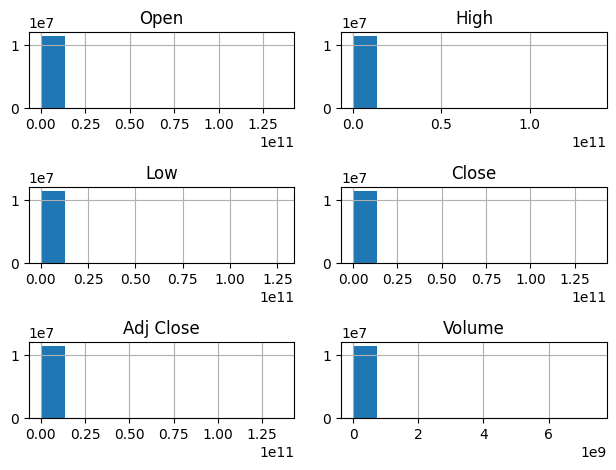

In [19]:
plt.figure(figsize=(20,20))
df.hist()
plt.tight_layout()
plt.show()


#KODUN AÇIKLAMASI:
#plt.figure(figsize=(20, 20)): Bu satır, bir matplotlib figürü oluşturarak histogramları görselleştirmek için gereken figür boyutunu belirler. 
#figsize=(20, 20) parametresi, genişlik ve yükseklik olarak sırasıyla 20 ve 20 inçlik bir figür oluşturur. Bu, daha büyük ve daha ayrıntılı bir 
#görselleştirme için geniş bir alan sağlar.

#df.hist(): Bu satır, DataFrame'in tüm sütunları için histogramlar oluşturur. Her bir histogram, sütundaki değerlerin dağılımını gösterir. 
#Bu dağılımlar, verilerin yoğunluklarını ve dağılımlarını anlamak için kullanılır.